In [ ]:
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import random
from sklearn.model_selection import train_test_split

targets = []
features = []
files = glob.glob("test_set/*/*.jpg")
random.shuffle(files)

for file in files:
    resized_img = Image.open(file).resize((75,75))
    vector_img = np.array(resized_img)
    features.append(vector_img)
    targets.append([int(spec in file) for spec in ["cat","dog"]])

features = np.array(features)
targets = np.array(targets)

x_train, x_val, y_train, y_val = train_test_split(features, targets, test_size=0.4, random_state = 2)

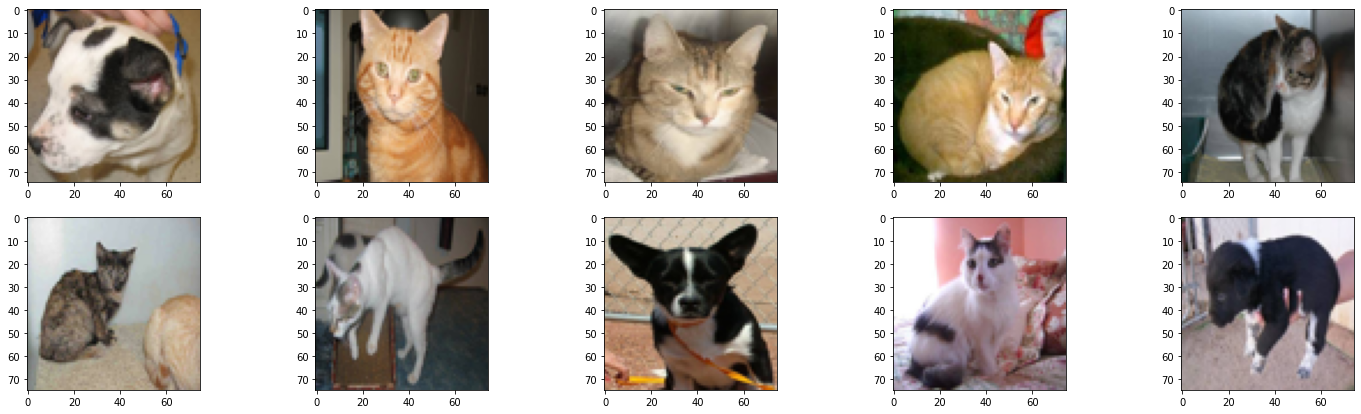

In [60]:
random_index = enumerate([random.randint(0, features.shape[0]) for i in range(10)])

fig = plt.figure(figsize=(25,7))
rows = 2
columns = 5

for index, img_index in random_index:
    fig.add_subplot(rows, columns, index+1)
    plt.imshow(features[img_index])
plt.show()

In [68]:
import tensorflow as tf

input_size = features.shape[1:]
label_size = targets.shape[1]

x = tf.placeholder(tf.float32, shape=[None,input_size], name = "images")
y = tf.placeholder(tf.float32, shape=[None,label_size], name = "targets")

# input layer
w1 = tf.Variable(tf.random.normal([input_size, label_size]))
b1 = tf.Variable(tf.zeros([label_size]))
# operations
z1 = tf.matmul(tf_features, w1) + b1

p = tf.nn.softmax(z1)

cost = tf.nn.softmax_cross_entropy_with_logits(labels = tf_targets, logits = z1)
optimizer = tf.train.GradientDescentOptimizer(learning_rate = lr)
train = optimizer.minimize(cost)

# metrics
pred_is_correct = tf.equal(tf.round(p), tf_targets)
accuracy = tf.reduce_mean(tf.cast(pred_is_correct, tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

(810, 75, 75, 3)

(75, 75, 3)